In [ ]:
pip install scipy==1.9.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scipy-1.9.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.8 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.8.0
    Uninstalling scipy-1.8.0:
      Successfully uninstalled scipy-1.8.0


In [ ]:
pip install networkx==2.8.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.6.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)


In [ ]:
import os
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import scipy.stats as sp
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [ ]:
# Read the file
url = 'https://snap.stanford.edu/data/soc-sign-bitcoinotc.csv.gz'
data = os.path.basename(url)
r = requests.get(url, allow_redirects=True)
open(data, 'wb').write(r.content)

397258

In [ ]:
# parse the file
cols = ['source', 'target', 'rating', 'time']
df = pd.read_csv(data, names=cols, header=None)
df['time'] = pd.to_datetime(df.time * 1e9)

In [ ]:
# Group the dataset by month (eliminated data from 2010 & 2016)
df_month = df.groupby(pd.Grouper(key='time', axis=0, freq='M', sort=True)).sum()
months = df_month.index.strftime('%Y-%m')
len(months) # 63
months = months[2:62]
months

Index(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12'],
      dtype='object', name='time')

In [ ]:
# The whole dataset
df = df.set_index('time')
df

,source,target,rating
time,,,
2010-11-08 18:45:11.728359936,6,2,4
2010-11-08 18:45:41.533780224,6,5,2
2010-11-08 19:05:40.390490112,1,15,1
2010-11-08 19:41:17.369750016,4,3,7
2010-11-08 22:10:54.447459840,13,16,8
...,...,...,...
2016-01-24 05:14:41.647290112,4499,1810,1
2016-01-24 23:50:28.049489920,2731,3901,5
2016-01-24 23:50:34.034019840,2731,4897,5


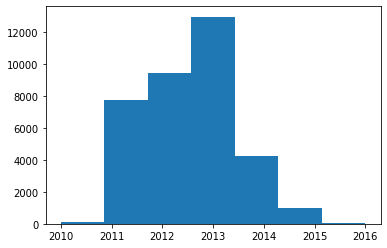

In [ ]:
dates = list(df.index.values)
years = []

for date in dates:
    years.append(int(str(date)[0:4]))

plt.hist(years, bins=7)
plt.show()

# Yearly vs Monthly in 2013

In [ ]:
yearly = {}
yr = ['2011', '2012', '2013', '2014', '2015']

for y in yr:
    yearly[y] = df.loc[y]

for k in yearly.keys():
    print(f'The total number of ratings in {k}: {len(yearly[k])}')
    # print(f'missing: {yearly[k].isna().sum()}') No missing values

The total number of ratings in 2011: 7758
The total number of ratings in 2012: 9432
The total number of ratings in 2013: 12982
The total number of ratings in 2014: 4225
The total number of ratings in 2015: 1011


In [ ]:
monthly = {}
for m in months:
    monthly[m] = df.loc[m]

monthly_ratings = []
for k in monthly.keys():
    # print(f'The total number of ratings in {k}: {len(monthly[k])}')
    monthly_ratings.append(len(monthly[k]))

print(monthly_ratings)

[99, 245, 194, 559, 1911, 2433, 558, 494, 282, 257, 296, 430, 387, 491, 563, 564, 612, 780, 907, 904, 1153, 1088, 991, 992, 896, 766, 1426, 1817, 1117, 968, 1091, 1934, 604, 638, 927, 798, 467, 526, 330, 544, 358, 398, 319, 432, 238, 230, 197, 186, 148, 119, 87, 96, 161, 90, 65, 80, 56, 38, 31, 40]


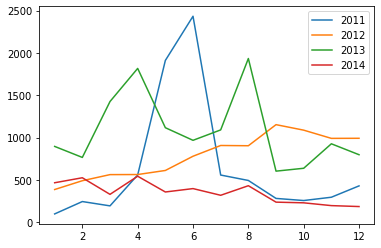

In [ ]:
ratings = []

for i in range(2011,2015):
  temp = []
  ratings.append(temp)
  for j in range(1,13):
    year_month = "%s-%s" % (i, j)
    ratings[i-2011].append(len(df.loc[year_month]))

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

fig, ax = plt.subplots()
ax.plot(x, ratings[0], label="2011")
ax.plot(x, ratings[1], label="2012")
ax.plot(x, ratings[2], label="2013")
ax.plot(x, ratings[3], label="2014")
ax.legend()
plt.show()

# PageRank

In [ ]:
for y in yearly.keys():
    # https://networkx.org/documentation/stable/reference/classes/multidigraph.html
    # https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html
    # Create a graph with the pandas dataframe
    g = nx.from_pandas_edgelist(yearly[y], 'source', 'target', edge_attr=['rating'], create_using=nx.MultiDiGraph())
    print(f"Nodes {y}: {g.number_of_nodes()} / Edges {y}: {g.number_of_edges()}")

    pr85 = nx.pagerank(g, alpha=0.85)
    
    for node, pagerank in pr85.items():
        print(f"Node {node} has a PageRank of {pagerank:.3f}")

Streaming output truncated to the last 5000 lines.
Node 2537 has a PageRank of 0.000
Node 856 has a PageRank of 0.001
Node 2355 has a PageRank of 0.000
Node 2538 has a PageRank of 0.002
Node 2539 has a PageRank of 0.000
Node 2540 has a PageRank of 0.001
Node 2541 has a PageRank of 0.000
Node 2542 has a PageRank of 0.000
Node 2543 has a PageRank of 0.000
Node 2544 has a PageRank of 0.000
Node 2545 has a PageRank of 0.000
Node 2546 has a PageRank of 0.000
Node 2547 has a PageRank of 0.000
Node 249 has a PageRank of 0.000
Node 710 has a PageRank of 0.001
Node 2548 has a PageRank of 0.001
Node 2549 has a PageRank of 0.001
Node 2550 has a PageRank of 0.000
Node 2551 has a PageRank of 0.000
Node 2552 has a PageRank of 0.000
Node 2553 has a PageRank of 0.000
Node 2555 has a PageRank of 0.000
Node 2556 has a PageRank of 0.000
Node 2557 has a PageRank of 0.000
Node 242 has a PageRank of 0.001
Node 384 has a PageRank of 0.000
Node 2 has a PageRank of 0.000
Node 245 has a PageRank of 0.000
Node 2

# Clustering coefficient

In [ ]:
def plot_clustering(graph,title):
  fig=plt.figure(figsize=(8,6))
  avg_clust=nx.average_clustering(graph)
  pos=nx.spring_layout(graph)
  cen = np.fromiter(degree_cen.values(), float)
  sizes = cen / np.max(cen) * 200
  normalize = mcolors.Normalize(vmin=cen.min(), vmax=cen.max())
  colormap = cm.RdYlGn # https://matplotlib.org/stable/tutorials/colors/colormaps.html

  scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
  scalarmappaple.set_array(cen)

  plt.colorbar(scalarmappaple)
  nc = nx.draw_networkx_nodes(
      graph, pos, nodelist=graph.nodes(), node_size=sizes, linewidths=2.0,
      node_color=sizes, cmap=colormap, alpha=0.8
      )
  ec = nx.draw_networkx_edges(graph, pos, arrows=True, alpha=0.2)
  plt.title(f'Average Clustering coefficient in {title}')
  ax = plt.axis('off')

  plt.show()

# Degree assortativity, centrality

In [ ]:
# https://networkx.org/documentation/stable/auto_examples/drawing/plot_directed.html#sphx-glr-auto-examples-drawing-plot-directed-py
# https://stackoverflow.com/questions/22967086/colouring-edges-by-weight-in-networkx
def plot_centrality(graph, title):
    fig = plt.figure(figsize=(8, 6))

    degree_cen = nx.degree_centrality(graph)
    pos = nx.spring_layout(graph)

    cen = np.fromiter(degree_cen.values(), float)
    node_sizes = cen / np.max(cen) * 200
    normalize = mcolors.Normalize(vmin=cen.min(), vmax=cen.max())
    colormap = cm.RdYlGn # https://matplotlib.org/stable/tutorials/colors/colormaps.html

    scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
    scalarmappaple.set_array(cen)

    # edges,weights = zip(nx.get_edge_attributes(graph,'weight').items())

    plt.colorbar(scalarmappaple)
    nc = nx.draw_networkx_nodes(
        graph, pos, nodelist=graph.nodes(), node_size=node_sizes, linewidths=2.0,
        node_color=node_sizes, cmap=colormap, alpha=0.8, label=True
        )
    ec = nx.draw_networkx_edges(graph, pos, arrows=True, alpha=0.2)
    plt.title(f'Degree centrality in {title}')
    ax = plt.axis('off')

    plt.show()

In [ ]:
# yearly
assort_ii = []
assort_oo = []
assort_io = []

for y in yearly.keys():
    # https://networkx.org/documentation/stable/reference/classes/multidigraph.html
    # https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html
    # Create a graph with the pandas dataframe
    g = nx.from_pandas_edgelist(yearly[y], 'source', 'target', edge_attr=['rating'], create_using=nx.MultiDiGraph())
    print(f"Nodes {y}: {g.number_of_nodes()} / Edges {y}: {g.number_of_edges()}")
    # print(nx.is_directed(g))

    # 1. Plot the average degree of the k nearest neighbours as a function of the vertices degree k
    # plot_scatter_knn_avgd(g, y)
    # 2. Compute the assortativity of the real network
    assort_decm_ii = nx.degree_pearson_correlation_coefficient(g, x = "in", y = "in", weight='weight')
    assort_ii.append(assort_decm_ii)
    assort_decm_oo = nx.degree_pearson_correlation_coefficient(g, x = "out", y = "out", weight='weight')
    assort_oo.append(assort_decm_oo)
    assort_decm_io = nx.degree_pearson_correlation_coefficient(g, x = "in", y = "out", weight='weight')
    assort_io.append(assort_decm_io)

    # https://www.sciencedirect.com/topics/computer-science/degree-centrality
    # 3. degree centrality
    # plot_centrality(g, y)

Nodes 2011: 1625 / Edges 2011: 7758
Nodes 2012: 1926 / Edges 2012: 9432
Nodes 2013: 2682 / Edges 2013: 12982
Nodes 2014: 1145 / Edges 2014: 4225
Nodes 2015: 371 / Edges 2015: 1011


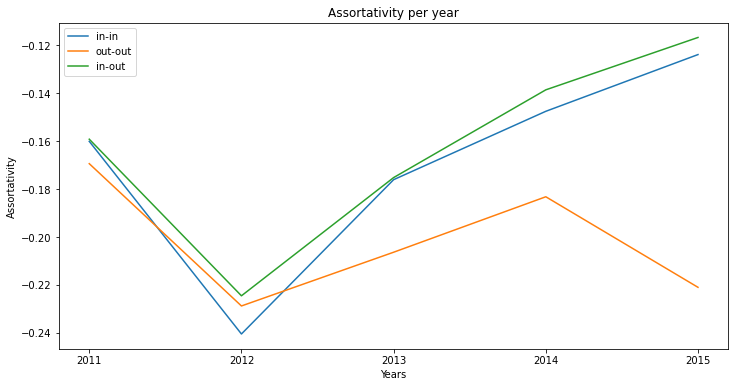

In [ ]:
fig = plt.figure(figsize=(12,6))

plt.plot(yr, assort_ii, label = "in-in")
plt.plot(yr, assort_oo, label = "out-out")
plt.plot(yr, assort_io, label = "in-out")

plt.title('Assortativity per year')
plt.xlabel("Years")
plt.ylabel("Assortativity")
plt.legend()

In [ ]:
nodes_m = []
edges_m = []

assort_ii_m = []
assort_oo_m = []
assort_io_m = []

cent = []
cent_in = []
cent_out = []

# Monthly
for m in months:
    # https://networkx.org/documentation/stable/reference/classes/multidigraph.html
    # https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html
    g = nx.from_pandas_edgelist(monthly[m], 'source', 'target', edge_attr=['rating'], create_using=nx.MultiDiGraph())
    # # of nodes & edges
    nodes_m.append(g.number_of_nodes())
    edges_m.append(g.number_of_edges())

    # 1. Plot the average degree of the k nearest neighbours as a function of the vertices degree k
    # plot_scatter_knn_avgd(g, y)

    # Assortativity
    assort_decm_ii = nx.degree_pearson_correlation_coefficient(g, x = "in", y = "in", weight='weight')
    assort_ii_m.append(assort_decm_ii)
    assort_decm_oo = nx.degree_pearson_correlation_coefficient(g, x = "out", y = "out", weight='weight')
    assort_oo_m.append(assort_decm_oo)
    assort_decm_io = nx.degree_pearson_correlation_coefficient(g, x = "in", y = "out", weight='weight')
    assort_io_m.append(assort_decm_io)

    # https://www.sciencedirect.com/topics/computer-science/degree-centrality
    # Degree centrality
    # plot_centrality(g, m)

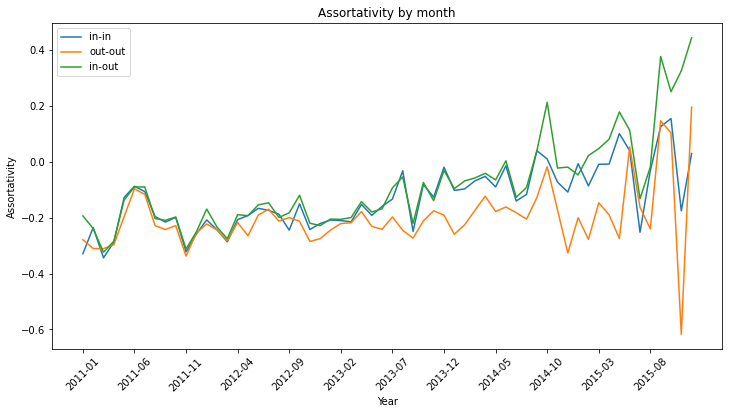

In [ ]:
fig = plt.figure(figsize=(12,6))
# fig, ax = plt.subplots(figsize=(12,6))

plt.plot(assort_ii_m, label = "in-in")
plt.plot(assort_oo_m, label = "out-out")
plt.plot(assort_io_m, label = "in-out")

plt.title('Assortativity by month')
plt.xlabel("Year")
plt.ylabel("Assortativity")

plt.xticks(np.arange(0,len(months),5), months[::5], rotation=45) # set divisor
plt.locator_params(axis='x', nbins=len(months)/5)  # set divisor 

plt.legend()

Text(0.5, 0, 'N')

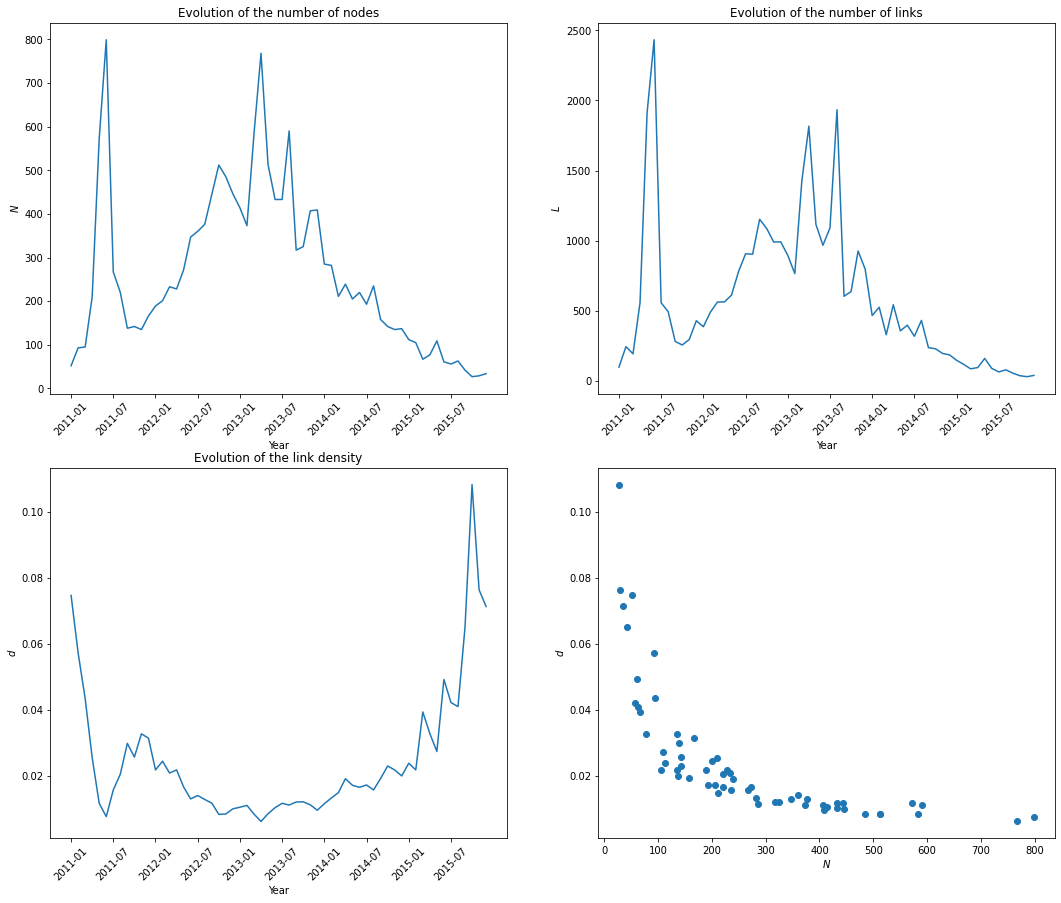

In [ ]:
# https://www.zora.uzh.ch/id/eprint/194399/1/fphy-08-00286.pdf
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(18,15))

ax1.plot(nodes_m)
ax1.set_xlabel("Year")
ax1.set_ylabel("N", style='italic')
ax1.set_title('Evolution of the number of nodes')
ax1.set_xticks(np.arange(0,len(months),6), months[::6], rotation=45)
ax1.locator_params(axis='x', nbins=len(months)/6)


ax2.plot(edges_m)
ax2.set_xlabel("Year")
ax2.set_ylabel("L", style='italic')
ax2.set_title('Evolution of the number of links')
ax2.set_xticks(np.arange(0,len(months),6), months[::6], rotation=45)
ax2.locator_params(axis='x', nbins=len(months)/6)


density_m = []
for i in range(len(nodes_m)):
    rho = 2*edges_m[i] / (nodes_m[i]*(nodes_m[i]-1))
    density_m.append(rho)
ax3.plot(density_m)
ax3.set_xlabel("Year")
ax3.set_ylabel("d", style='italic')
ax3.set_title('Evolution of the link density')
ax3.set_xticks(np.arange(0,len(months),6), months[::6], rotation=45)
ax3.locator_params(axis='x', nbins=len(months)/6)

ax4.scatter(nodes_m, density_m)
ax4.set_ylabel('d', style='italic')
ax4.set_xlabel('N', style='italic')